<h1 style="color: blue; font-size: 72px;"">Short Rate Models  </h1> 

<a style=" font-size: 36px;" href="./Models_de_taux.ipynb">Summary</a>



## 1.Bonds 

## 1.1 Multiple coupon bonds  

A bond is a type of debt security where the issuer borrows money from investors and agrees to pay them back with interest over a specified period of time. Bonds are commonly issued by governments and companies looking to raise funds for various projects and goals ( Various bonds can be found in the : <a href="https://www.londonstockexchange.com/live-markets/price-explorer/advanced-bond-search" target="_blank">London Stock Exchange </a> website )

Bonds have multiple key features :
- Issuer : The entity that borrows money
- Face Value $F$ : Which is the amount that will be repaid to the bondholder at the bond's maturity. It is usually 1000\$ per bond.
- Coupon Rate $r$ : The interest rate with which the issuer agrees to pay the owner of the bond. It is almost always a fixed percentage of the bonds Face Value.
- Annual Coupon Payment : $C = r*F$ it's the amount that the owner of the bonds get every time he gets a coupon (usually it's annual, but it can be monthly, semiannual, etc) 
- Time to Maturity $T$ : The date when the bond's face value will be paid back
- Market interest rate $r_{c}$ : bonds can be bought and sold in the secondary markets before their maturity dates. The price of a bond fluctuates based on the current interest rates of the market which is why having an idea of where they will be in the future is important for bond holders

The value of the bond at the time of the acquirement is given by the following formula:

$$
\text{Bond Price} = \sum_{t=1}^{T} \frac{C}{(1+r_{c})^{t}} + \frac{F}{(1+r_{c})^{T}} = \sum_{t=1}^{T} \frac{r*F}{(1 + r_{c})^{t}} + \frac{F}{(1+r_{c})^{T}}
$$


for example, let's say Apple issued bonds on the 10 of february 2023 with the following features :
- Face Value $F$ = 1000\$
- Coupon Rate $r$ = $5$%
- Number of coupons = 5
- Time to Maturity $T$ = 5

Shortly afterwards let's consider 3 different scenarios :
- The market interest rate didn't change $r = r_{c}$
- The market interest rate went up by 100 base points $r_{c1} = 6$%
- The market interest rate went down by 100 base points $r_{c2} = 4$%

let's see how the bond price changes in these different scenarios

In [6]:
import matplotlib as plt
from math import *

def Bondprice(F,r,N,rc):
    P = 0 
    for i in range(N) :  
        P += r*F/(1+rc)**i
    P = P + F/(1+rc)**N
    return P
    
print(f" The value of the bond when the interest rate doesn't change is : Bond price = {round(Bondprice(1000,5,5,5),2)}$ \n When it goes up by a 100 base points the value is : Bond price = {round(Bondprice(1000,5,5,6),2)} $ \n When it goes down by a 100 base points the value is : bond price = {round(Bondprice(1000,5,5,4),2)}$")
        

 The value of the bond when the interest rate doesn't change is : Bond price = 5999.36$ 
 When it goes up by a 100 base points the value is : Bond price = 5833.05 $ 
 When it goes down by a 100 base points the value is : bond price = 6248.32$


## 1.2 Zero Coupon Bonds

A **Zero-Coupon Bond** is a bond that does not make periodic interest payments ( that we named coupons). Instead you buy a bond and you get the face value + interest at the maturity date. 
There are 2 different instances :  

-  You buy the bond at a discount to its face value, for instance if $ F_{v} = 1000 \$ $, you could buy a bond at 950 $\$ $ and then get 1000 $\$ $ one year later at maturity, making 50 $\$ $ ( 1000-950)
-  You buy the bond at face value for instance if $ F_{v} = 1000 \$ $, you could buy a bond at 1000 $\$ $ and then get 1000 $\$ $ one year later at maturity, making 50 $\$ $ ( 1050-1000)

When the stochastic nature of interest rates isn't accound for it is priced as follow : 

$$ P(t,T) = \frac{F_{v}}{(1+r)^{T-t}} $$

this is valid when rates are constant, risk-free and deterministic.

In [7]:
import matplotlib as plt
from math import *

def ZCBprice(F,r,T,t):
    """
    F is Future value 
    r is current interest rate 
    N is maturity 
    t is the current year 
    """
    return F/((1+r)**(T-t))

print(f' The price when bond is issued with the following details \n Face value : {1000} $ \n Market rates : {0.04} %  \n Maturity : {5} years \n is P = {round(ZCBprice(1000,0.04,5,0),2)} $') 

 The price when bond is issued with the following details 
 Face value : 1000 $ 
 Market rates : 0.04 %  
 Maturity : 5 years 
 is P = 821.93 $


Now let's assume the interest rates go down and up by 100 bp 

In [8]:
print(f' the price when the current interest rate is still 4% : {round(ZCBprice(1000,0.04,5,1),2)} $ \n the price when the current interest rate is 5% : {round(ZCBprice(1000,0.05,5,1),2)} $\n the price when the current interest rate is 3% : {round(ZCBprice(1000,0.03,5,1),2)} $ ')  

 the price when the current interest rate is still 4% : 854.8 $ 
 the price when the current interest rate is 5% : 822.7 $
 the price when the current interest rate is 3% : 888.49 $ 


Whether dealing with zero-coupon or coupon-paying bonds, changes in interest rates significantly affect the value of bonds. This is why it is crucial for investors to simulate interest rate variations to effectively manage their risk. 

## 2 Short-Rate Models
Short-rate models focus on the short rate, which is the interest rate applicable over an incredibly short period of time, known as an infinitesimal. An <a style ="color:blue;" href=""> Infinitesimal</a> is a non-zero quantity that is so close to 0 that it’s smaller than any other non-zero real number. This short rate plays a crucial role in many financial models because it is used to construct the entire term structure of interest rates (also known as the yield curve), which shows the relationship between interest rates and different time horizons.

## <b>How Short-Rate interest models work ?</b>
A short-rate model typically represents the short rate $𝑟(𝑡)$ as a stochastic process, meaning that its path is driven by both deterministic (predictible) and Brownian (random )factors. The short rate keeps fluctuating over time due to the inherent uncertainty of financial markets.


- **deterministic Factors** : this component models predictable tendencies like mean-reverting behavior as interest rates tend to move towards a long-term equilibrum
- **Brownian Motion** : Often Modeled using brownian motion, it reprents the uncertainty and volatility of financial markets
  
  
as mentioned, the short rate is modeled by a stochastic differential equation (SDE) under the form : 

$$ dr(t) = {\mu}(r(t),t)dt + {\sigma}(r(t),t){dW(t)}$$

in this equation : 
- ${\mu}(r(t),t)$ is called the **drift** term it represents the expected change of the rate $r(t)$ over an infinitesimal time interval.
- ${\sigma(r(t),t)}$ is the **volatility** term, is reflects the level of uncertainty in the movement of the short rate
- $dW(t)$ represents a Brownian Motion, a standard mathematical model for random fluctuations in financial processes 

### <a id ="vasicek"> 2.1 Vasicek Model (1977) </a>

The Vasicek Model, introduced in 1977, is one of the earliest and most recognized models used to describe how interest rates behave over time. It's a **mean-reverting** short-rate model, meaning it assumes that while interest rates can fluctuate randomly, they eventually tend to revert back toward a long-term average. The Vasicek model was revolutionary for its time because it gave a mathematically manageable way to track the evolution of interest rates, especially in times of economic uncertainty (end of the gold standard in 1971, 1973 Oil Crisis, Collapse of Breton Woods etc ...)



The Vasicek Model uses an SDE as seen above : 

$$ dr(t)= a(b-r(t))dt + {\sigma}d{W(t)} $$

Where :
- $r(t)$ is the short rate at time t.
- $a$ is the speed of mean reversion, in simpler terms it represents how quickly the short rate returns to its long-term mean.
- $b$ is the long-term mean rate that the rate is supposed to revert to.
- ${\sigma}$ is the **Volatility** which is the standard
- $dW(t)$ is the increment of the Wiener process ( a Brownian motion with $\mathbb{E}[X]$ = 0, $\text{Var}(X) = f(t)$)
  


Interpretation :

 $$ a(b-r(t)) $$ 
 
This part of the model is known as the **Deterministic Component**. It pulls the short rate back toward its long-term mean, denoted as $b$. Whenever the short rate $𝑟(𝑡)$ rises above the long-term mean $b$, the deterministic component becomes negative, pulling the rate back down. Since the **Wiener process** has a mean of zero, it doesn't affect this tendency. The parameter $b$ controls the speed of this reversion, meaning it dictates how fast or slow the rate moves back toward the mean $b$. A large $a$ means a faster adjustment, while a smaller $a$ results in slower reversion.


$$ {\sigma} dW(t)$$

This term represents the random fluctuations in the sort rate due to market volatility, it models the uncertainty in interest rate movements. The parameter ${\sigma}$ represents the size of these fluctuations (i.e, **the volatility**). The higher the ${\sigma}$ the more volatile the interest rates.

## 2.2 Zero-Coupon Bond pricing under Vasicek Model 

When the interest  rate varies constantly with time, the expression for pricing a zero-coupon bond ( as a reminder the zero coupon bond is a bond that pays a fixed amount usually refered to as **the face value F** at maturity T and makes no intermediate payement. 
The present value of this bond is discounted by the short rate r(t) as follow : 
$$ P(t, T) = F . \mathbb{E}^Q \left[ e^{-\int_t^T r(s) \, ds} \mid \mathcal{F}_t \right]$$ 
with as follow :
- $\mathbb{E}^Q $ : is the expected value under the **risk neutral measure $Q$**
  - the risk neutral measure is a probability measure that is widely used in financial mathematics for pricing derivatives and other financial instruments more <a href="https://www.math.cmu.edu/~gautam/sj/teaching/2016-17/944-scalc-finance1/pdfs/ch4-rnm.pdf"> here </a>.
- $\int_t^T r(s) \, ds$ : Integral of the sort rate over remaining of the bond's lifetime
- $\mathcal{F}_t$ : Filtration associated to our risk neutral measure, represents the information known at time t.

Using the Vacicek Model, the Zero-couponbond price can be expressed as : 
$$ P(t,T) = F  e^{-A(t,T) - B(t,T)r(t)}$$ 

with :
- $A(t,T)$ : A time-dependant function
- $B(t,T)$ : A time-dependant function
- $r(t)$ : The short rate at time t
  
with our 2 time functions defined as follow :
- $B(t, T) = \frac{1 - e^{-a(T-t)}}{a}$
- $A(t, T) = \left( b - \frac{\sigma^2}{2a^2} \right) \left( B(t, T) - T + t ) \right) - \frac{\sigma^2}{4a} B(t, T)^2$

## 2.3 Test

In this section we are going to try to implement the Vasicek Model on the US Federal_Fund_Rates date that we will fetch using opensource Free API AlphaVantage : https://www.alphavantage.co/documentation/#

My goal, was to use the Maximum likelihood estimation Method f to estimate Vasicek parameters, and then stimulate different possible scenarios for our function.

In [1]:
#Importing all libraries and relevant tools for conveniency 

import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize 

# Using AlphaVantage free API Key and documentation we can import data from the recent FEDERAL FUND RATES, which are the interest rate at which instituions lend money to other institutions overnight in the United States of America 
api_key = 'MNBX49QP1JKFK3KG'
url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&apikey={api_key}'
response = requests.get(url)
data = response.json()
data = data['data']


values = np.array([float(entry['value']) for entry in data])


Let's display the rates we got from our 2 tables

1- Estimating the Parameters : 
in order to do so, we are going to use the Maximum likelihood estimation.
First we use the Ito formula to $r_t \exp(-a\delta)$ to obtain the explicit form of the Vacicek rate 
$$r_{t + \delta} = r_t e^{-a\delta} + k(1 - e^{-a\delta}) + \sigma \sqrt{\frac{1 - e^{-2a\delta}}{2a}} \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 1)$$
with ${\epsilon}$ the Standard Normal Noise $\mathcal{N}(0, 1)$

$$ \log(L(a,b,\sigma)) = \sum_{t = 1}^{n} \frac{1}{E \sqrt{2 \pi}} \exp\left( - 0.5 \frac{(x - sig)^2}{E^2} \right)$$

with $E = V  \sqrt\frac{ 1 - \exp(-2at)}{2a}$  
and 
$ sig = r  \exp(-a*t) + K ( 1 - \exp(-at))$ 

In [71]:
#We supposed that the volatility is constant ( which is not plausible)
values = np.array([float(entry['value']) for entry in data])
data_ = values [731:]
X_train = data_ [:100]
X_test = data_ [50:]

STD = np.std(values/100)
v = STD * np.sqrt(12)
print(v)

0.12365809762852496


In [72]:
print(values.shape)

(844,)


In [73]:
#Defining the normal distribution affiliated with the model
def N_Vas(x,a,k,t,r):
    
    E = v * np.sqrt((1 - np.exp(-2 * a * t)) / (2 * a))
    
    sig = r * np.exp(-a * t) + k * (1 - np.exp(-a * t))
    
    return ((1 / (E * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - sig) / E)**2))
# Defining the maximum likelihood estimation
def log_likelihood(parameters, X_train):
    a, k = parameters
    S=0
    t=1/12
    epsilon = 1e-15 
    penalty = 0.01 * (a**2 + k**2)
    #Here I added a very small number because I had some cases where P was equal to 0
    for i in range (len(X_train)-1):
        P = N_Vas(X_train[i+1], a, k, t, X_train[i])
        S-= np.log(P)      
    return(S)

In [74]:

# Estimating the parameters with the constraints on a and k being positive 
constraints = ({'type': 'ineq', 'fun': lambda params: np.exp(params[0])},  # a >= 0
               {'type': 'ineq', 'fun': lambda params: params[1]-0.02})  # k >= 0

estimateresults = minimize(log_likelihood, [0.1, 0.03], args=(X_train,), constraints=constraints)
estimated_parameters = estimateresults.x
# print the estimated parameters
a, b = estimated_parameters
#a = round(estimated_a,4)
#b = round(estimated_k,4)
print(f" the estimated parameter a is : {a} \n the estimated parameter b is : {b}")


 the estimated parameter a is : 0.06601536820341627 
 the estimated parameter b is : 0.02000000000000258


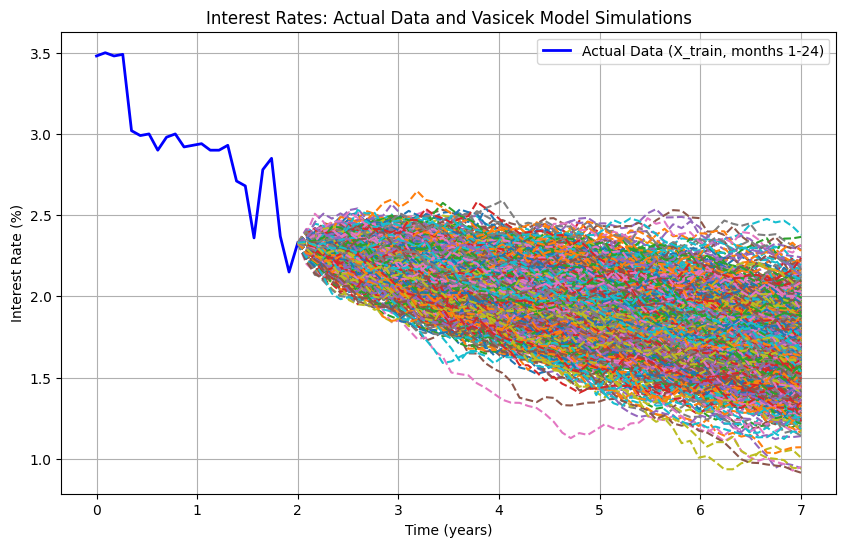

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *

# Our Vasicek parameters, we estimated a and k prior to that and calculated Sigma
a, b = estimated_parameters
sigma = v
r0 = X_train[23]  

# Simulation settings
T = 5  
period = 1/12 
N = T*12
t = np.linspace(2, T+2, N) 
num_simulations = 1000 
F = 1000

# Vasicek Simulation
def sim_vasicek(a, b, sigma, r0, N, period):
    r = np.zeros(N)
    r[0] = r0
    dW = np.random.normal(0, np.sqrt(period), N)
    for i in range(1, N):
        dr = a * (b - r[i-1]) * period + sigma * dW[i]
        r[i] = r[i-1] + dr
    return r
## B and A function for pricing 
def B(t, T, a):
    return (1 - np.exp(-a * (T - t))) / a

def A(t2, T2, a, b, sigma):
    B_t_T = B(t2, T2, a)
    term1 = (b - sigma**2 / (2 * a**2)) * (B_t_T - (T2 - t2))
    term2 = (sigma**2 / (4 * a)) * B_t_T**2
    return np.exp(term1 - term2)

# Plot the actual data (X_train) for the first 24 months
plt.figure(figsize=(10,6))
t_real = np.linspace(0, 2, 24)  
plt.plot(t_real, X_train[:24], label='Actual Data (X_train, months 1-24)', color='blue', linewidth=2)

# Plot multiple Vasicek simulations from month 24 to month 84
for i in range(num_simulations):
    r_vasicek = sim_vasicek(a, b, sigma, r0, N, period)
    plt.plot(np.linspace(2, 7, N), r_vasicek, linestyle='--')

# plotting and making the graph more readable
plt.title('Interest Rates: Actual Data and Vasicek Model Simulations')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


This Model presents multiples qualities but also limits :  
**Qualities** 
- Mean-Reversion :  One of the most notable advantages of this model is its ability to capture the mean-reversion behavior of interest rates, which aligns with empirical observations. Interest rates tend to fluctuate around a long-term average, and this model reflects that reality effectively.
- Simplicity : this model is simple to implement as you have seen above
- Analytical solution : Another key strength is its mathematical tractability. The model offers closed-form solutions for the pricing of bonds and certain derivatives, such as zero-coupon bonds, making it efficient and practical for many financial applications.   

**Limits**

- Constant votality : One limitation is the assumption that volatility remains constant over time. In reality, volatility fluctuates due to changing economic conditions, and this model does not account for that variation, potentially reducing its accuracy.
- Posibility of Negative rates : The vasicek model allows for the possibility of **negative** interest rates. This happens because the model is based on a normal distribution for interest rate changes which doesn't prevent negative values even though in most markets, negative rates are often unrealistic ( that is not always the case ECB 2014, SNB 2015).
- **Complex calibration** :  this model is hard to calibrate, accurately estimating its parameters ( mean-reversion speed, long-term mean and volatility) requires vigorous data and elaborated algorithms, for example in our case, just taking a training sett of the last 299 interest rates instead of the last 300 th can make a big difference in our parameters and give us completely different scenarions  

## 3 Cox-Ingersoll-Ross (CIR) model ( 1985)


The **Cox-Ingersoll-Ross** model is a widely recognized interest rate model that improves upon the limitations of the *Vasicek model* especially when dealing with short-term interest rate dynamics.
The CIR models addresses some of they key weaknesses found in the Vasicek model, particularly its allowance for *negative* interest rates, which this mode successfully avoids.

The CIR Model uses the following Stochastic differential equation : 

$$ dr(t) = a(b-r(t))dt + \sigma\sqrt{r(t)} dW(t) $$

Where again :
- $r(t)$ is the short rate at time t.
- $a$ is the speed of mean reversion, in simpler terms, it represents how quickly the sort rate returns to its long-term mean.
- $b$ is the long-term mean rate that the rate is supposed to revert to.
- ${\sigma}$ is the **Volatility** which is the standard
- $dW(t)$ : is the increment of the Wiener process ( a Brownian motion with $\mathbb{E}[X]$ = 0, $\text{Var}(X) = f(t)$)

the following conditions needs to be respected $ a, b, r_{0} = r(0) , \sigma $ positive and $ 2ab > \sigma^{2} $
  

The critical different of the CIR model is that it prevents **negative values**. the term $ \sqrt{r(t)} $ in the volatility function ensures that the variance of the rate changes becomes smaller as the interest rate approaches zero. This means that the model naturally prevents rates from becoming negative because as r(t) gets closer and closer to 0, the drift term $a(b-r(t))$ pulls the rate back up while the volatility part gets smaller

# 3.1 Bond pricing under the CIR model

As seen with the Vasicek model, once again the zero-coupon bond price can be expressed as : 
$$ P(t, T) = e^{-A(t, T) - B(t, T) r(t)} $$ 
with : 
- $\gamma = \sqrt{a^2 + 2\sigma^2}  $ 
- $B(t, T) = \frac{2 \left( e^{\gamma (T-t)} - 1 \right)}{\left( \gamma + a \right) \left( e^{\gamma (T-t)} - 1 \right) + 2\gamma}$
- $A(t, T) = \frac{2 a k}{\sigma^2} \ln\left( \frac{2 \gamma e^{\frac{\gamma + a}{2} (T-t)}}{\left( \gamma + a \right) \left( e^{\gamma (T-t)} - 1 \right) + 2\gamma} \right)$

# 3.2 Test 
There is no explicit solution to this model so we will transform the differential to a small variation : 

$$\Delta r = a(b - r_t) \, \Delta t + \sigma \sqrt{r_t} \, \sqrt{\Delta t} \, \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 1)$$

once again we will code the normal distribution function and use  MSE method to try to estimate parameters based on data of the Federal funds rates evolutions and then run multiple scenarios going for the upcoming next 5 years

In [91]:
#Defining the normal distribution affiliated with the model
def N_CIR(x, a, k, t, r):
    
    E = v * np.sqrt(r * t)
    
    sig = r + t * a * (k - r)
    return ((1 / (E * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.square((x - sig) / E)))
def log_likelihood_CIR(parametres, X_train):
    a, k = parametres
    S=0
    t=1/12
    for i in range (len(X_train)-1):
        P = (N_CIR(X_train[i+1], a, k, t, X_train[i])) 
        S-=np.log(max(P,1))
    return(S)
    

In [99]:

# Estimating the parameters with the constraints on a and k being positive 
constraints = ({'type': 'ineq', 'fun': lambda params: np.exp(params[0])},  # a >= 0
               {'type': 'ineq', 'fun': lambda params: params[1]-0.01})  # k >= 0

estimateresults = minimize(log_likelihood_CIR, [0.1,0.01], args=(X_train,), constraints=constraints)
estimated_parameters = estimateresults.x
# print the estimated parameters
estimated_a, estimated_k = estimated_parameters
print(f" the estimated parameter a is : {estimated_a} \n the estimated parameter b is : {estimated_k}")



 the estimated parameter a is : 0.01313671645388844 
 the estimated parameter b is : 0.009999999999999974


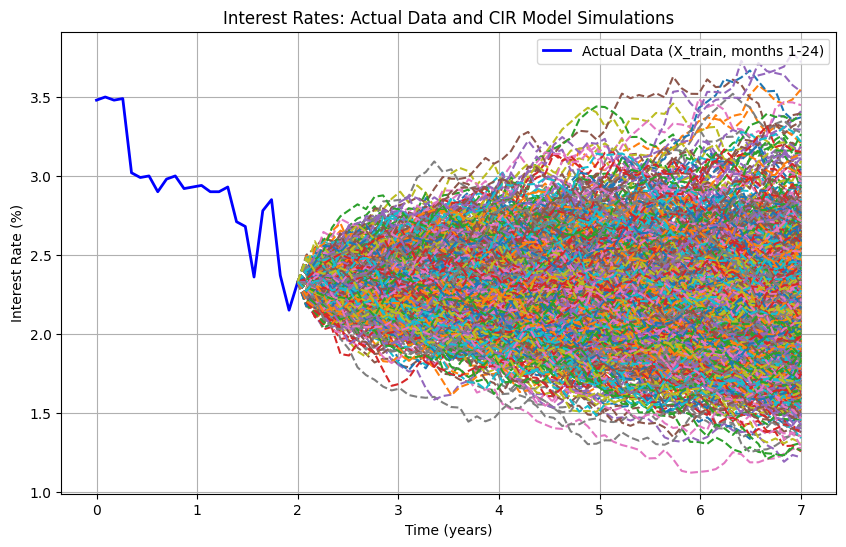

In [100]:
# Our CIR parameters, we estimated a and k prior to that and calculated Sigma
a,b = estimated_parameters
sigma = 0.12373113986190391  
r0 = X_train[23]  

# Simulation settings
T = 5  
period = 1 / 12  
N = T*12
t = np.linspace(2, T+2, N) 
num_simulations = 1000 


# CIR simulation
def sim_CIR(a, b, sigma, r0, N, period):
    r = np.zeros(N)
    r[0] = r0
    dW = np.random.normal(0, np.sqrt(period), N)
    for i in range(1, N):
        dr = a * (b - r[i-1]) * period + sqrt(r[i-1])*sigma * dW[i]
        r[i] = r[i-1] + dr
    return r

# Plot the actual data (X_train) for the first 24 months
plt.figure(figsize=(10,6))
t_real = np.linspace(0, 2, 24)  
plt.plot(t_real, X_train[:24], label='Actual Data (X_train, months 1-24)', color='blue', linewidth=2)

# Plot multiple CIR simulations from month 24 to month 84
for i in range(num_simulations):
    r_CIR = sim_CIR(a, b, sigma, r0, N, period)
    plt.plot(np.linspace(2, 7, N), r_CIR, linestyle='--')

#Ploting and making the graph more readable  
plt.title('Interest Rates: Actual Data and CIR Model Simulations')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


This plot showcases the interest rate in the last 2 years ( 01-09-2022 to 01-09-2024) and then 1000 different simulations for the next 5 upcoming years

This model showcases many qualities and limits like the Vasicek Model :    
**Qualities**  
- Unlike the Vasicek model, the CIR model prevents the **Non-negative interest rates** by adding the square root of the interest rate  to the volatility component 
- Just like the Vasicek model the **Mean reversion** is an important quality because it aligns with empirical observations of the market
- The cir is widely used **Risk-Neutral pricing** of financial derivatives such as swaptions and caps/floors     .

**Limits** 
- Like the Vasicek the CIR model assumes **Constant volatility** which is in reality often stochastic or time varying because heavily dependant on economic-societal factors
- **Sensitivity to parameter Changes** : the Model is extremely sensitive to changes in parameters, especially the volatility parameter, which in its case is poorly defined. (Assumed constant, but over what period is that considered true ? since the creation of the rate ? last 2,5,10,15 years ? )
- **Complex calibration** : just like the Vasicek model, this model is hard to calibrate, accurately estimating its parameters ( mean-reversion speed, long-term mean and volatility) requires vigorous data and elaborated algorithms, for example in our case, just taking a training sett of the last 299 interest rates instead of the last 300 th can make a big difference in our parameters and give us completely different scenarions  

# 4 Hull-White Model (1990)

In both the Vasicek and CIR models, we made the assumption that volatility remains constant. This is a significant simplification. In practice, this assumption does not hold because interest rates are influenced by a variety of factors—economic, political, and market-specific—that cause volatility to fluctuate over time.

We can consider for example periods of economic instability or political uncertainty (such as the recent Covid Crisis) : these tend to push interest rate volatility higher. Likewise, actions from central banks, such as changes in monetary policy (Japanese Central Bank recent interest rate change), unexpected shifts in inflation data, or major geopolitical events (Recent conflicts like in Middle east and in Ukraine), can lead to short-term spikes or abrupt changes in volatility. These dynamic economic factors directly affect how interest rates behave, and as a result, volatility adapts accordingly.

The hull model introduces **Time-Dependent Parameters** to fix this 

$$ dr(t) = (\theta(t) - a\,r(t))dt + \sigma(t)dW(t)$$

Just like for the Vasicek Model : 
- $r(t)$ is the short rate at time t.
- $dW(t)$ : is the increment of the Wiener process ( a Brownian motion with $\mathbb{E}[X]$ = 0, $\text{Var}(X) = f(t) $
As you can see Both 
- The **drift term** $\theta(t)$ 
- The **volatility** $\sigma(t)$

are time dependant, which depicts interest rates way more accurately and is more practical for the current yield curve, which is one of the strongest advantages this model holds over other making it the obvious choice whenever market calibration is crucial. 

Currently the implementation of the  Hull White method because of technical limits implementing the MLE method and exams at university.
I am reviewing the following <a href="https://www.sciencedirect.com/science/article/pii/S0927539822001086 ">paper</a> to understand how to implement likelyhood method for the Hull-Method 

Here is a table to Summarize everything that we said : 